#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import file

In [2]:
df = pd.read_csv(r'C:\Users\tunm2\Desktop\VS CODE\projects\amazon\amazon.csv')

### EDA

##### 1. Basic infomation about the dataset

In [3]:
df.head(3) #Printout first 3 rows of the dataset

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


Sau khi print 3-5 dòng đầu của df, ta nhận thấy data của chúng ta đang gặp một số vấn đề hiện hữu sau:
- Cột category ở dạng Nested, cách nhau bởi dấu |
- 2 cột discounted_price & actual_price đang chứa kí tự liên quan đến đơn vị tiền tệ ₹
- Cột user_name bao gồm tất cả các user đã review cho sản phẩm, cách nhau bởi dấu phẩy (,)
- Cột review_id tương tự, chứa các id của bài review, cách nhau bởi dấu (,)

In [4]:
df.shape

(1465, 16)

pd.DataFrame là cú pháp của pandas, cho ta 1 mô tả về số lượng (dòng,cột) của df
- Số dòng: 1465
- Số cột: 16

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

pd.DataFrame.info() là cú pháp của pandas, giúp chúng ta hình dung về tệp dữ liệu bao gồm
- Các cột tên là gì?
- Số lượng dòng không null là bao nhiêu? Từ đó ta cũng có thể đối chiếu với df.shape ở trên để hình dung xem có thể có những cột nào chứa dòng nào chứa null
- Kiểu dữ liệu của các cột là gì?

In [6]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

pandas.DataFrame.columns giúp liệt kê tất cả tên các cột dữ liệu theo hàng ngang, cách nhau bởi dấu phẩy. Điều này giúp thuận tiện hóa việc loại bỏ các cột mà chúng ta có thể không cần sử dụng. Ví dụ sẽ được nêu dưới đây:

In [7]:
df_remove_columns_example = df[
    ['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
    #    'about_product', 
       'user_id', 'user_name'
    #    , 'review_id'
       , 'review_title'
    #    ,'review_content'
    #    , 'img_link'
    #    , 'product_link'
       ]
]
df_remove_columns_example.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,user_name,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","Good speed for earlier versions,Good Product,W..."


Ở ví dụ trên, có thể thấy, ta đã chủ động lọc 3 cột với thao tác:
- Copy tất cả các cột đang có tại kết quả của df.columns
- Paste vào trong df[ [ ] ]
- Thực hiện lọc bỏ các cột không cần thiết bằng cách tách dòng, sử dụng Ctrl + / để biến cột đó thành 1 comment
Do đây là 1 ví dụ nên ta gán tên df này là df_remove_columns_example

#### 2. Spot duplicated values, unique values, null cells, NA values

In [8]:
df.duplicated().sum()

0

Ở đây ta có thể thấy, không xuất hiện việc trùng lặp các dòng dữ liệu trong df, tức là mỗi dòng dữ liệu trong df là unique, không cần thao tác gì thêm, nhưng nếu có, ta có thể suy nghĩ về việc lọc bỏ các dòng duplicated (nếu cần) như dưới đây

In [9]:
df_remove_duplicated_example = df.drop_duplicates()
df_remove_duplicated_example.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


pd.DataFrame.drop_duplicates trả lại ta kết quả về 1 df sau khi đã lọc bỏ các dòng duplicated. Tuy nhiên, trong df này không xảy ra sự duplicated nên sẽ không có sự khác biệt của 2 df là df và df_remove_duplicated_example

#### Spot null/na values

In [10]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [11]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

- Document của PyData về Pandas, họ có đã nói: "DataFrame. isnull is an alias for DataFrame. isna."
- Tức là về bản chất, pandas.DataFrame.isnull hay pandas.DataFrame.isna là một. Chúng ta có thể sử dụng 1 trong 2 đều được.
- pandas.DataFrame.isnull().sum() trả lại cho chúng ta một kết quả về tổng số lượng các giá trị null của df là bao nhiêu?
- Ví dụ như ở trên, ta nhận thấy rating_count đang có 2 giá trị null, trong khi các cột khác thì không có giá trị null nào

In [12]:
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


Ở đây, ta gọi đích danh cột 'rating_count' do đây là cột chứa giá trị null
- Sử dụng cú pháp df['rating_count'] để gọi tên cột 
- Sử dụng df[df['rating_count'].isnull()] để lọc các dòng của 'rating_count' bị null trong df
- Ta nhận được kết quả là các dòng chứa null trong cột 'rating_count' sẽ hiện giá trị là NaN

#### 4. Replace các dữ liệu cần thiết và chuyển đổi kiểu dữ liệu cho các cột

In [13]:
df['rating_count'] = df['rating_count'].replace(np.nan,"0")

Cần chuyển đổi giá trị NaN thành 1 giá trị khác (tạm coi là giá trị 0 - do NaN có thể hiểu đồng nghĩa với việc không có lượt đánh giá nào)
- Sử dụng df['cột cần replace giá trị'].replace(giá trị A, giá trị thay thế cho A) để thực hiện
- np.nan: gọi giá trị cần thay thế là 'NaN' 
- 0: gọi giá trị thay thế cho 'NaN' là 0

In [14]:
df[df['rating'] == "|"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


Ở các bước dưới, ta phát hiện được thêm là không thể chuyển đổi kiểu dữ liệu của cột 'rating' sang float/int        
=> Pandas báo lí do là: could not convert string to float: '|'      
=> Trong cột có giá trị "|"       
=> Tìm ra những line có giá trị df['rating'] == "|" để xem qua dữ liệu trước khi replace

In [15]:
df['rating'] = df['rating'].str.replace("|","0")
df['rating_count'] = df['rating_count'].str.replace(",","")
df['discounted_price'] = df['discounted_price'].str.replace(",","")
df['actual_price'] = df['actual_price'].str.replace(",","")
df['discounted_price'] = df['discounted_price'].str.replace("₹","")
df['actual_price'] = df['actual_price'].str.replace("₹","")
df['discount_percentage'] = df['discount_percentage'].str.replace("%","")

- rating: Thay thế dấu "|" thành 1 giá trị khác, ở đây chọn giả sử là 0.
- rating_count: Ta cần xóa dấu phẩy trong cột rating_count vì dấu "," được điền giữa các số nhằm mục đích phân tách hàng nghìn, hàng đơn vị. Ví dụ 23,499 => 23499 để khi đó ta có thể convert kiểu dữ liệu thành integer/float (pandas không hiểu "," là hàng nghìn/triệu/...)
- discounted_price / actual_price: chứa kí hiệu liên quan đến tiền, không thể convert dữ liệu thành int/float. Tương tự như trên 2 cột này cũng có "," để ngăn cách => Cần loại bỏ kí tự đồng tiền và ","
- discount_percentage: chứa kí tự %, không chuyển đổi được kiểu dữ liệu khác => Loại bỏ kí tự %

Lưu ý rằng: Có rất nhiều cách thay thế giá trị bằng 1 giá trị khác đối với các dữ liệu có kiểu số học (int/float)
- Thay bằng số trung bình: mean()
- Thay bằng frequency: mode()
- ...

In [16]:
df['discounted_price'] = df['discounted_price'].astype(float)
df['actual_price'] = df['actual_price'].astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(float)
df['rating'] = df['rating'].astype(float)
df['rating_count'] = df['rating_count'].astype(int)

Sau khi replace để xóa dấu "," như trên, pandas đã cho phép ta convert kiểu dữ liệu từ object thành integer hoặc float tùy vào giá trị thực tế có thể có của các cột
- int = integer = số nguyên
- float = số thực

#### 6. Thêm các cột có thể cần trong việc phân tích

In [17]:
df['user_id_count'] = df['user_id'].str.count(",").astype(int)
df['user_name_count'] = df['user_name'].str.count(",").astype(int)
df['review_id_count'] = df['review_id'].str.count(",").astype(int)

Tạo thêm 3 cột mới, đếm số lượng dấu "," ở 3 cột user_id, user_name và review_id để xem là có bao nhiêu:
- ID người đánh giá
- Tên người đánh giá
- ID bài viết đánh giá

In [18]:
print(df['user_id_count'].sort_values(ascending=True).unique())
print(df['user_name_count'].sort_values(ascending=True).unique())
print(df['review_id_count'].sort_values(ascending=True).unique())

[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7]


Dùng .sort_values(ascending=True) để sort cột theo thứ tự từ A-Z
Dùng .unique() kế tiếp để trả về list các giá trị có trong cột tương ứng cho ra kết quả
- Với cột user_id_count: [0 1 2 3 4 5 6 7]
- Với cột user_name_count: [0 1 2 3 4 5 6 7 8]
- Với cột review_id_count: [0 1 2 3 4 5 6 7]

In [19]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,user_id_count,user_name_count,review_id_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,7,7,7
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,7,7,7
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,7,7,7


In [20]:
category_split = df['category'].str.split(pat = "|",expand=True,n = 2)
category_split

,0,1,2
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories|WaterPurifierAccess...
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances|Rice&PastaCookers
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters|HeatConvectors
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans|ExhaustFans


Tiến hành tách cột 'category' bằng việc sử dụng pd.DataFrame.str.split, trong đó:
- pat = '|' : tách các chuỗi bởi dấu '|' do cột category đang ở dạng Nested, cách nhau bởi dấu '|'
- expand = True : đồng ý với việc mở rộng thêm các cột mới
- n = 2 : số lần tách chuỗi. VD ở đây nếu chỉ có nhu cầu xem 2 tầng category thì chọn n = 2

In [21]:
df['category_lv1'] = category_split[0]
df['category_lv2'] = category_split[1]

Từ dataframe category_split ở trên, ta tạo các cột tương ứng với df gốc ban đầu
- category_split[0] là cột category_split đầu tiên sẽ được đặt tên là 'category_lv1'
- category_split[1] là cột category_split đầu tiên sẽ được đặt tên là 'category_lv2'

In [22]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'user_id_count',
       'user_name_count', 'review_id_count', 'category_lv1', 'category_lv2'],
      dtype='object')

Kiểm tra lại các cột thì thấy đã có thêm 2 cột vừa tạo là 'category_lv1' và 'category_lv2'

In [23]:
df.drop(columns=['category','img_link','product_link'],inplace=True)

Giả sử muốn drop các cột sau với lí do:
- 'category': đã tạo ra 2 cột category_lv1 và category_lv2 rồi
- 'img_link','product_link': không có nhu cầu sử dụng
Sử dụng pd.DataFrame.drop(columns = ['các columns cách nhau bởi dấu phẩy'],inplace = True)
   
Trong đó:
- columns: liệt kê các cột cần drop
- inplace = True: ghi đè lên dataframe hiện tại

In [24]:
df['category_lv1'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

Print ra những giá trị unique trong category_lv1 thì thấy về mặt hiển thị chưa được đẹp, các từ đang bị dính nhau, nên cần phải tách ra

In [25]:
df['category_lv1'] = df['category_lv1'].str.replace('Computers&Accessories', 'Computers & Accessories')
df['category_lv1'] = df['category_lv1'].str.replace('MusicalInstruments' , 'Musical Instruments')
df['category_lv1'] = df['category_lv1'].str.replace('OfficeProducts' , 'Office Products')
df['category_lv1'] = df['category_lv1'].str.replace('Home&Kitchen' , 'Home & Kitchen')
df['category_lv1'] = df['category_lv1'].str.replace('HomeImprovement' , 'Home Improvement')
df['category_lv1'] = df['category_lv1'].str.replace('Toys&Games' , 'Toys & Games')
df['category_lv1'] = df['category_lv1'].str.replace('Car&Motorbike' , 'Car & Motorbike')
df['category_lv1'] = df['category_lv1'].str.replace('Health&PersonalCare' , 'Health & Personal Care')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   float64
 5   rating               1465 non-null   float64
 6   rating_count         1465 non-null   int32  
 7   about_product        1465 non-null   object 
 8   user_id              1465 non-null   object 
 9   user_name            1465 non-null   object 
 10  review_id            1465 non-null   object 
 11  review_title         1465 non-null   object 
 12  review_content       1465 non-null   object 
 13  user_id_count        1465 non-null   int32  
 14  user_name_count      1465 non-null   int32  
 15  review_id_count      1465 non-null   i

In [27]:
df.duplicated().sum()

65

Sau khi drop 1 số cột không cần dùng thì nhận thấy được có 65 dòng đang bị duplicated  
Điều này là do các thông tin chủ yếu cần được sử dụng đang giống hệt nhau, ở df cũ không spot ra duplicated do img_link hoặc product_link của chúng đang bị giống nhau
Tiến hành drop duplicated lần cuối ở bước tiếp theo

In [28]:
df.drop_duplicates(inplace=True)

Giờ đây, df đã clean, sẵn sàng để được visualize

### Visualization

<Axes: >

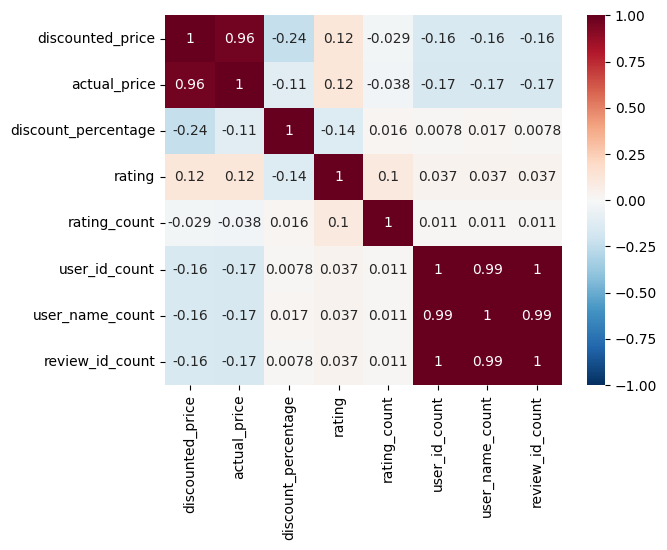

In [29]:
sns.heatmap(data = df.corr(),annot=True,cmap='RdBu_r',vmax = 1.0, vmin = -1.0)

Sử dụng sns.heatmap với df.corr() để xem biểu đồ nhiệt về mức độ tương quan giữa các cột trong df  
- df.corr(): hệ số tương quan Pearson đôi một giữa các cột
- annot = True: hiển thị giá trị tương quan
- cmap: tên hệ màu colormap đã có sẵn, có thể xem thêm tại documents online
- vmin = -1 ; vmax = -1: để cố định khoảng tham chiếu 

Phân tích ý nghĩa:
- corr = 1: tương quan dương mạnh
- corr = 0: không có sự tương quan nào
- corr = -1: tương quan âm mạnh

Ví dụ, tại đây:
- Các cột có tương quan dương mạnh là các cặp: 
+ discounted_price vs. actual price: điều này là dễ hiểu do 2 mức giá này liên quan mật thiết đến nhau
+ user_name_count vs. user_id_count || user_name_count vs. review_id_count || review_id_count vs. user_id_count: có giá trị 0.99 - 1 tức là 3 trường thông tin này có tương quan mạnh mẽ đến nhau. Có thể nói nôm na là: số lượng user_name tăng lên có thể dẫn đến sự tăng lên về user_name_count hay review_id_count và ngược lại

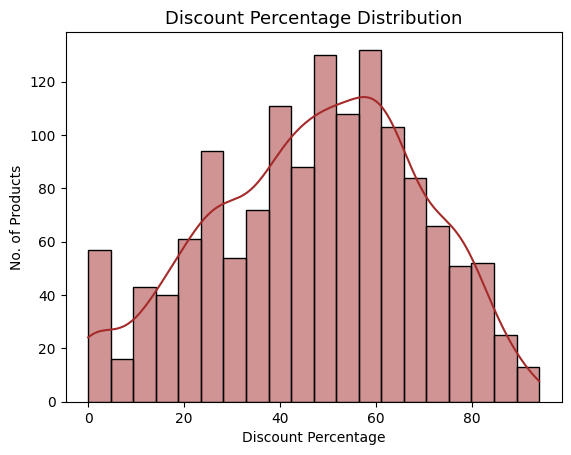

In [30]:
sns.histplot(data=df['discount_percentage']
             ,kde = True
             ,color = 'brown'
             ,bins=20)
plt.title('Discount Percentage Distribution',size = 13)
plt.xlabel('Discount Percentage')
plt.ylabel('No. of Products')
plt.show()

Đây là biểu đồ phân bố số lượng product với các khoảng discount
- Ta có thể nhận thấy histogram có khá nhiều đỉnh, tượng trưng cho việc các sản phẩm tập trung chủ yếu ở các  
phân loại mức %discount khác nhau. Điều này có thể đến từ sự phân bố %discount khác nhau giữa các Category/Sub-Category    

Ta sẽ kiểm tra giả thuyết trên như sau:

In [31]:
category_list = df['category_lv1'].unique()
category_list

array(['Computers & Accessories', 'Electronics', 'Musical Instruments',
       'Office Products', 'Home & Kitchen', 'Home Improvement',
       'Toys & Games', 'Car & Motorbike', 'Health & Personal Care'],
      dtype=object)

Ta lấy ra list distinct các category bằng hàm .unique()

Kết quả nhận được category_list gồm:

 ['Computers & Accessories', 'Electronics', 'Musical Instruments',   
                        'Office Products', 'Home & Kitchen', 'Home Improvement',   
                        'Toys & Games', 'Car & Motorbike', 'Health & Personal Care']

In [32]:
len(category_list)

9

Ta kiểm tra số lượng items trong category_list để tiến hành vẽ subplots
- Giá trị thu về: 9
- Subplot sẽ có dạng: (3x3)

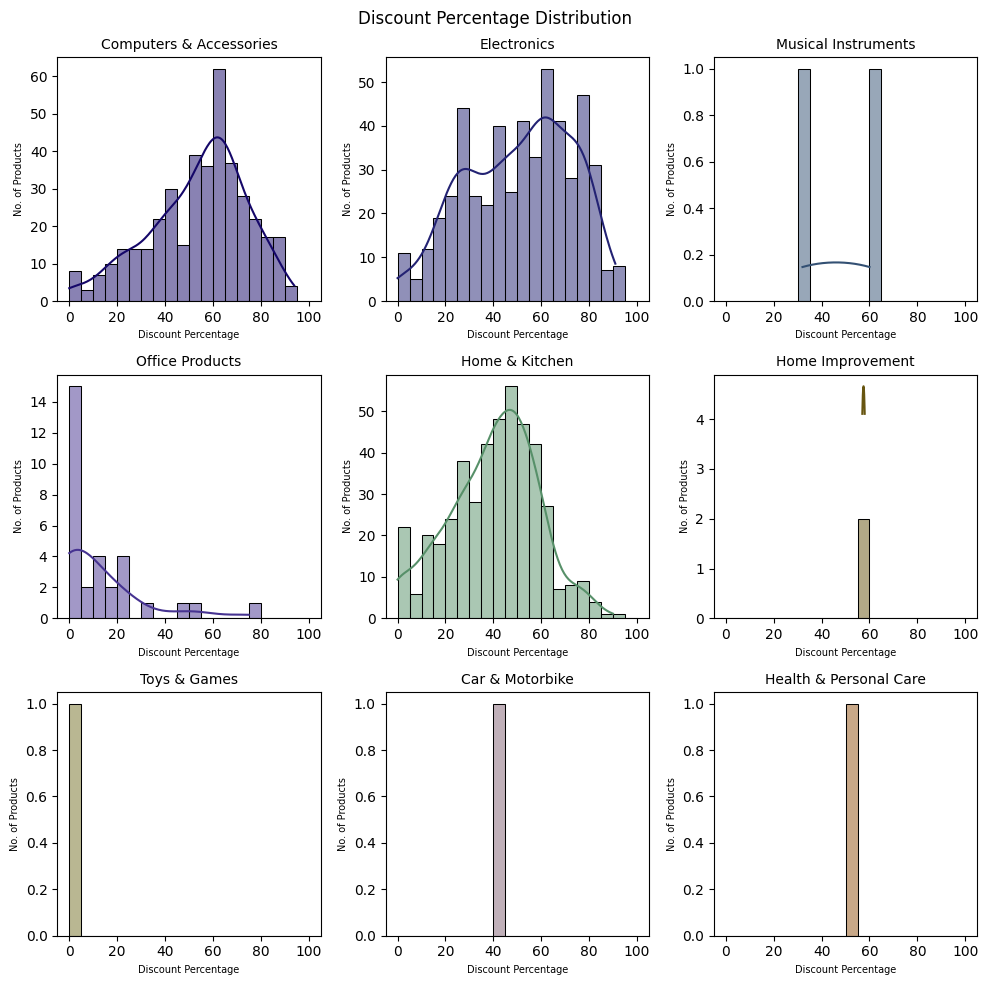

In [33]:
fig,ax = plt.subplots(nrows=3
                      ,ncols=3
                      ,figsize = (10,10))
x = 100000
n = 0
plt.suptitle('Discount Percentage Distribution')
for a in range(0,3):
    for b in range(0,3):
        df_x = df[df['category_lv1']==category_list[n]]
        sns.histplot(data=df_x['discount_percentage']
                    ,kde = True
                    ,color = f'#{np.random.randint(x,x+100000)}'
                    ,bins=20
                    ,binrange=(0,100)
                    ,ax = ax[a][b])
        ax[a][b].set_title(category_list[n],size = 10)
        ax[a][b].set_xlabel('Discount Percentage',size = 7)
        ax[a][b].set_ylabel('No. of Products',size = 7)
        n+=1
        x+=100000
plt.tight_layout()
plt.show()

Có thể thấy, giả thuyết của chúng ta phần nào đã đúng khi các category
- Có số lượng products khác nhau 
- Phân bố discount percentage khác nhau

Cụ thể sự phân bố của discount percentage của các category lớn (nhiều product_id) tập trung chủ yếu tại 1 số khoảng:
- Computers & Accessories: ~60%
- Electronics: ~30-80%
- Office Products: ~10%
- Home & Kitchens: ~50%


In [34]:
df_groupby_category_lv1 = df.groupby(by = 'category_lv1') \
                            .agg(total_rating_count = ('rating_count','sum')
                                ,distinct_product =('product_id','nunique')
                                ,avg_rating = ('rating','mean')
                                ,median_rating = ('rating','median')
                                ) \
                                .reset_index()
df_groupby_category_lv1

,category_lv1,total_rating_count,distinct_product,avg_rating,median_rating
0,Car & Motorbike,1118,1,3.800000,3.80
1,Computers & Accessories,6949282,375,4.153885,4.20
2,Electronics,15667992,490,4.079612,4.10
3,Health & Personal Care,3663,1,4.000000,4.00
4,Home & Kitchen,2991069,448,4.031696,4.10
5,Home Improvement,8566,2,4.250000,4.25
6,Musical Instruments,88882,2,3.900000,3.90
7,Office Products,149675,31,4.309677,4.30
8,Toys & Games,15867,1,4.300000,4.30


Tạo 1 df liên quan đến việc group by category_lv1 với các agg như:
- total_rating_count: sum(rating_count)
- distinct_product: count(distinct product_id)
- avg_rating / median_rating: lần lượt là trung bình, trung vị của của rating sản phẩm

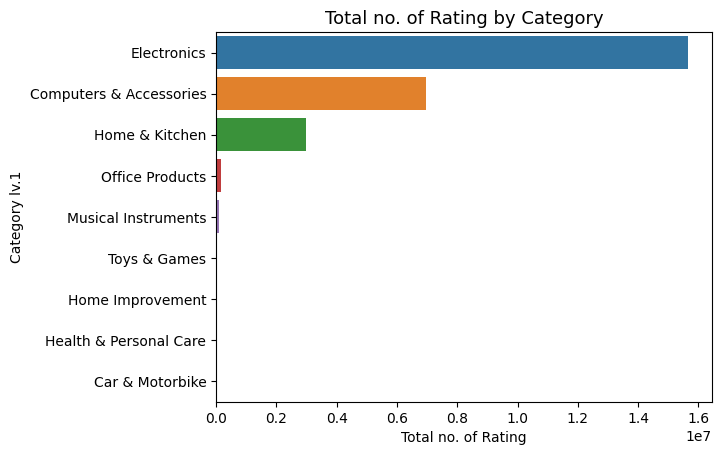

In [35]:
sns.barplot(data=df_groupby_category_lv1.sort_values(by='total_rating_count'
                                                     ,ascending=False)
            ,y= 'category_lv1'
            ,x='total_rating_count'
            )
plt.title('Total no. of Rating by Category',fontsize = 13)
plt.xlabel('Total no. of Rating')
plt.ylabel('Category lv.1')    
plt.show()   

Có thể thấy, các lượt rating chủ yếu đến từ 3 Category là: 
- Electronics
- Computers & Accesories
- Home & Kitchen

Điều này cũng dễ hiểu do như phía trên, ta nhận định được đây là 3 trong 9 Category chính (có số lượng sản phẩm nhiều nhất)